# Random Forests para Arboles de Regresion

In [5]:
import pandas as pd
import numpy as np

In [6]:
dataset=pd.read_csv('../python-ml-course/datasets/boston/Boston.csv')
dataset.head()
#https://www.kaggle.com/c/boston-housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
dataset.shape

(506, 14)

### Procesamiento de Datos

In [8]:
predictors=dataset.columns.values.tolist()[:13]
target=dataset.columns.values.tolist()[13]
X=dataset[predictors]
Y=dataset[target]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=0)

### Creacion del modelo

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
regtree=DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)
regtree.fit(x_train,y_train)
predictions=regtree.predict(x_test)

list(zip(predictions,y_test))[:11]

[(23.659259259259258, 22.6),
 (26.742105263157896, 50.0),
 (23.05454545454546, 23.0),
 (13.891304347826088, 8.3),
 (19.487999999999996, 21.2),
 (21.518181818181816, 19.9),
 (21.4047619047619, 20.6),
 (21.518181818181816, 18.7),
 (21.4047619047619, 16.1),
 (19.757894736842108, 18.6),
 (10.466666666666667, 8.8)]

### Visualizacion de Arbol

In [13]:
from sklearn.tree import export_graphviz

In [14]:
with open('boston-rtree.dot','w') as dotfile: #creamos un archivo llamado iris-dtree.dot
    export_graphviz(regtree,out_file=dotfile,feature_names=predictors) #seteamos los parametros(modelo,archivo,predictores)
    dotfile.close()

In [15]:
import os
from graphviz import Source #(conda install python-graphviz)

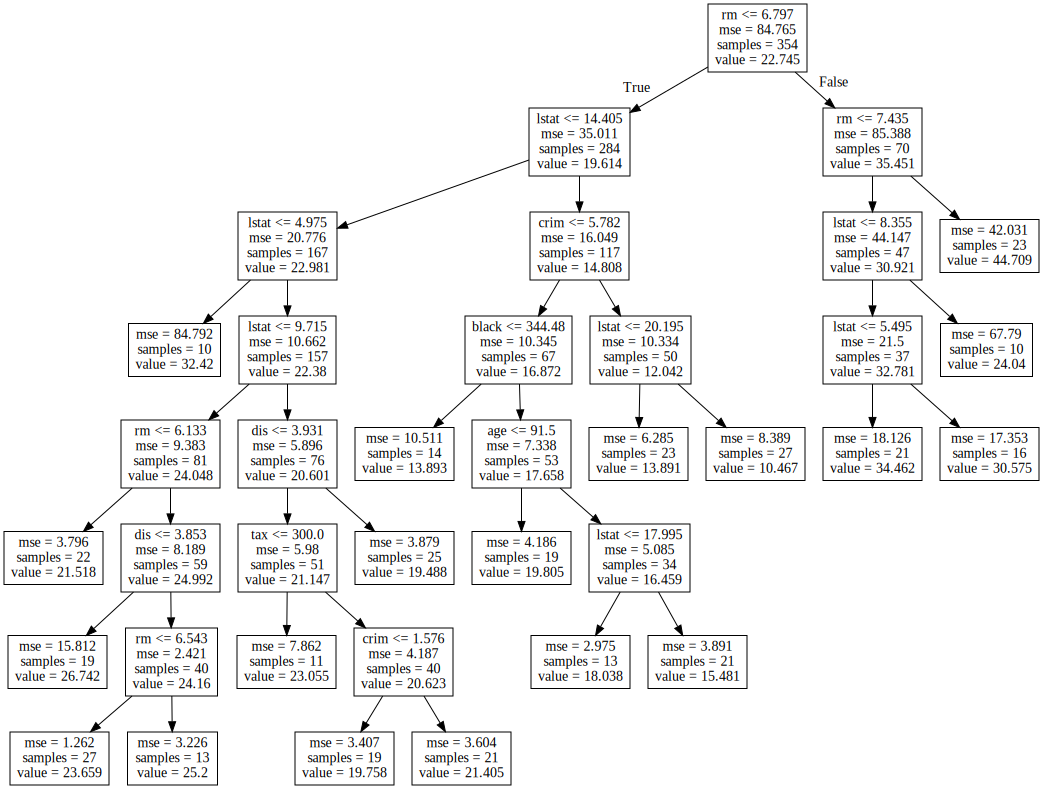

In [16]:
file=open('boston-rtree.dot','r')
text=file.read()
Source(text)

### Validacion del Modelo

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
cross_validation=KFold(n_splits=10,shuffle=True,random_state=1)
scores=cross_val_score(regtree,X,Y,scoring='mean_squared_error',cv=cross_validation,)
scores.mean()#score basado en el error cuadrado (mas cercano a cero es mejor)

-20.107307036443846

In [19]:
list(zip(predictors,regtree.feature_importances_)) #importancia de las variables

[('crim', 0.027408822548249674),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.0),
 ('rm', 0.6798194971320766),
 ('age', 0.005383674422757539),
 ('dis', 0.005208671542042429),
 ('rad', 0.0),
 ('tax', 0.0020127138087849723),
 ('ptratio', 0.0),
 ('black', 0.006193859266693023),
 ('lstat', 0.27397276127939585)]

# Random Forests

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
forest=RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=10)
#oob_score=Si queremos que el propio modelo se encargue de hacer el muestreo
#n_estimators=numero de arboles del forest
forest.fit(x_train,y_train)

/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [41]:
forest.score(x_test,y_test)

0.8253795676777035

In [33]:
list(zip(forest.oob_prediction_,y_train))

[(12.940000000000001, 14.4),
 (24.450000000000003, 24.4),
 (17.8, 18.1),
 (23.7, 22.5),
 (17.75, 20.5),
 (16.866666666666667, 15.2),
 (21.7, 17.4),
 (19.7, 13.6),
 (10.059999999999999, 8.7),
 (21.140000000000004, 18.2),
 (33.833333333333336, 35.4),
 (30.075, 31.7),
 (36.5, 33.0),
 (19.839999999999996, 22.2),
 (21.0, 20.4),
 (26.2, 23.9),
 (22.75, 25.0),
 (12.675, 12.7),
 (25.4, 29.1),
 (11.125, 12.0),
 (19.580000000000002, 17.7),
 (26.266666666666666, 27.0),
 (20.35, 20.6),
 (9.457142857142857, 10.2),
 (17.7, 17.5),
 (19.866666666666664, 19.7),
 (23.333333333333332, 29.8),
 (22.700000000000003, 20.5),
 (16.45, 14.9),
 (15.75, 10.9),
 (19.924999999999997, 19.5),
 (19.566666666666666, 22.7),
 (18.5, 19.5),
 (24.05, 24.6),
 (27.133333333333336, 25.0),
 (28.5, 24.5),
 (43.583333333333336, 50.0),
 (16.72, 14.3),
 (9.3, 11.8),
 (28.425, 31.0),
 (31.433333333333337, 28.7),
 (20.26, 16.2),
 (45.13333333333333, 43.5),
 (23.959999999999997, 25.0),
 (25.639999999999997, 22.0),
 (20.35, 19.9),
 (2